## Table of Contents


1) Import Libraries and Data

2) Create bar chart, a histogram, a scatterplot, and a line chart visualizations

3) Sales by time visualization

4) Distribution of loyalty visualization

5) Prices by time visualization

6) Age and family status visualizations

7) Age and Spendign power visualizations

8) Export visualizations and dataframe

### 1) Import Libraries and Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#define path
path =r'C:\Users\Owner\Documents\Career Foundry\Tasks\Data Immersion Tasks\Instacart Project'

In [3]:
#import customer orders products combined data as df_cust_ord_prod
df_cust_ord_prod = pd.read_pickle(os.path.join(path,'2 Data', 'prepared data', 'final_orders_products_customers.pkl'))

In [4]:
#check shape of df_cust_ord_prod
df_cust_ord_prod.shape

(32435059, 33)

In [5]:
#checked head of df_cust_ord_prod
pd.set_option('display.max_columns', None)
df_cust_ord_prod.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_2_days,busiest_period_of_day,max_order,loyalty_flag,avg_user_price,spend_flag,median_days_since_order,frequency_flag,first_name,last_name,Gender,STATE,Age,date_joined,num_of_dependants,fam_status,income,_merge
0,2539329.0,1.0,1.0,2.0,8.0,NaN,196,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
1,2398795.0,1.0,2.0,3.0,7.0,15.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
2,473747.0,1.0,3.0,3.0,12.0,21.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Regularly busy,Least busy,Most orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
3,2254736.0,1.0,4.0,4.0,7.0,29.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Least busy,Least busy,Average orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
4,431534.0,1.0,5.0,4.0,15.0,28.0,196,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Least busy,Least busy,Most orders,10.0,New Customer,6.367797,Low Spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both


## 2)
If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

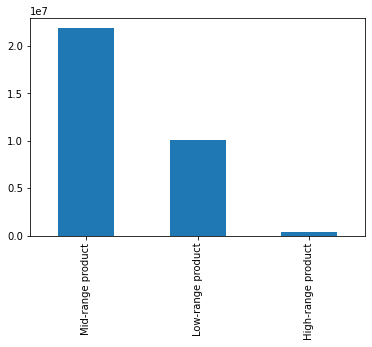

In [6]:
#create bar chart of count of price_range column
bar_price_range = df_cust_ord_prod['price_range'].value_counts().plot.bar()

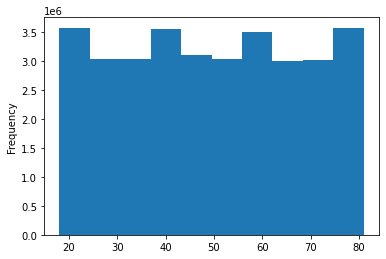

In [7]:
#create histogram of age of customers
histo_age = df_cust_ord_prod['Age'].plot.hist(bins = 10)

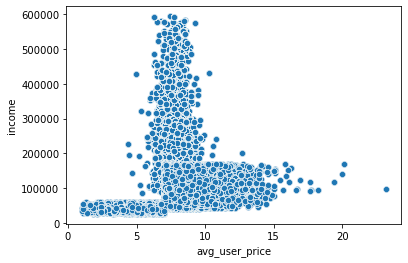

In [32]:
#create scatterplot with columns avg_user_price and income
scatter_age_avg_user_price = sns.scatterplot(x='avg_user_price', y='income', data=df_cust_ord_prod)

## Note here: 
After removing the 'prices' outliers I didnt realise that 'avg_user_price' and the 'spend_flag' columns would be affected until running this scatterplot. I re ran the code in the 2 lines below from 4.8 to set the 'avg_user_price' and the 'spend_flag' columns but will not be including that here.

In [9]:
df_cust_ord_prod = df_cust_ord_prod.drop(columns=['avg_user_price'])

In [10]:
df_cust_ord_prod['avg_user_price'] = df_cust_ord_prod.groupby('user_id')['prices'].transform(np.mean)

In [11]:
#create list 'dev' of true false values for entire dataframe based on random values between 0 and 1 being less than .9
np.random.seed(4)
dev = np.random.rand(len(df_cust_ord_prod)) <= 0.9

In [12]:
#create sample of 10% of df_cust_ord_prod data as df_small
df_small = df_cust_ord_prod[~dev]

In [13]:
#reduce df_small to only the 'orders_day_of_the_week' and 'prices' columns
df_small = df_small[['orders_day_of_week','prices']]

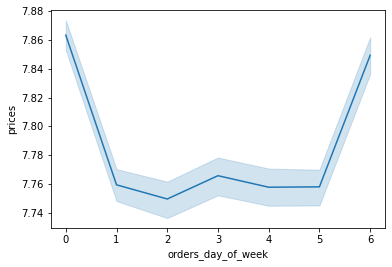

In [14]:
#create line graph of 'orders_day_of_the_week' and 'prices' from df_small
line_sample = sns.lineplot(data= df_small, x = 'orders_day_of_week',y = 'prices')

## 3)
You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

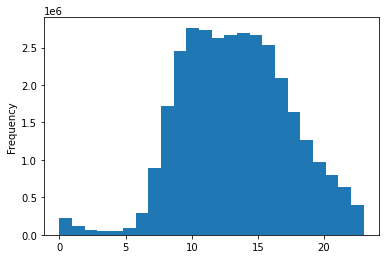

In [15]:
#create histogram for order_hour_of_day
histogram_order_hour_of_day = df_cust_ord_prod['order_hour_of_day'].plot.hist(bins = 24)

We have a count of orders here for each hour of the day. The morning stays quite low in demand for orders until about 6 am. After 6 am orders roughly double each hour until about 9am. We hit the max amount of orders around 10 am and this stays fairly consistent until about 3pm. We see a more gradual decline than the morning increase but it is a consistent decline from 3pm on till the end of the day.

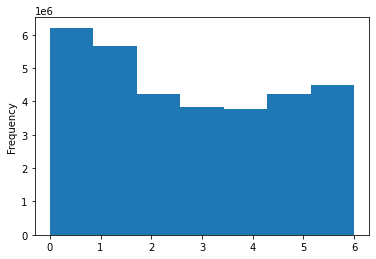

In [16]:
#create histogram for orders_day_of_week
histogram_order_hour_of_day = df_cust_ord_prod['orders_day_of_week'].plot.hist(bins = 7)

## 4)
The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

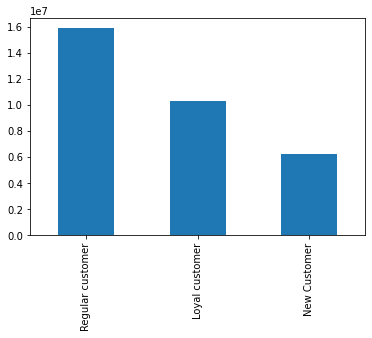

In [17]:
#create a bar chart of the loyalty_flag column counts
bar_loyalty_flag = df_cust_ord_prod['loyalty_flag'].value_counts().plot.bar()

## 5)
Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [18]:
# find prices by hour of the day for df_cust_ord_prod to compare against sample to be visualized
df_cust_ord_prod.groupby('order_hour_of_day').agg({'prices':['mean','min','max']})

prices           
                       mean  min   max
order_hour_of_day                     
0.0                7.811152  1.0  25.0
1.0                7.805706  1.0  25.0
2.0                7.799211  1.0  25.0
3.0                7.828101  1.0  25.0
4.0                7.838612  1.0  25.0
5.0                7.828162  1.0  25.0
6.0                7.817802  1.0  25.0
7.0                7.820043  1.0  25.0
8.0                7.790509  1.0  25.0
9.0                7.753561  1.0  25.0
10.0               7.749879  1.0  25.0
11.0               7.772038  1.0  25.0
12.0               7.789222  1.0  25.0
13.0               7.793418  1.0  25.0
14.0               7.802823  1.0  25.0
15.0               7.805949  1.0  25.0
16.0               7.802705  1.0  25.0
17.0               7.806522  1.0  25.0
18.0               7.809833  1.0  25.0
19.0               7.794163  1.0  25.0
20.0               7.800359  1.0  25.0
21.0               7.805543  1.0  25.0
22.0               7.816838  1.0  25.0
23.0               7.797452  1.0  25.0

In [19]:
#create random true/false list of df_cust_ord_prod for 85/15 split of data
np.random.seed(4)
list85_15 = np.random.rand(len(df_cust_ord_prod)) <=0.85

In [20]:
#create sample of df_cust_ord_prod called df_sample15 of 15% of data
df_sample15 = df_cust_ord_prod[~list85_15]

In [21]:
#check sample accuracy against prices by hour of the day for df_cust_ord_prod
df_sample15.groupby('order_hour_of_day').agg({'prices':['mean','min','max']})

prices           
                       mean  min   max
order_hour_of_day                     
0.0                7.759151  1.0  25.0
1.0                7.784273  1.0  25.0
2.0                7.776755  1.0  24.7
3.0                7.818712  1.0  25.0
4.0                7.902959  1.0  25.0
5.0                7.814933  1.0  25.0
6.0                7.848509  1.0  25.0
7.0                7.809368  1.0  25.0
8.0                7.787567  1.0  25.0
9.0                7.754970  1.0  25.0
10.0               7.745748  1.0  25.0
11.0               7.774937  1.0  25.0
12.0               7.790384  1.0  25.0
13.0               7.809826  1.0  25.0
14.0               7.806648  1.0  25.0
15.0               7.801148  1.0  25.0
16.0               7.797838  1.0  25.0
17.0               7.804115  1.0  25.0
18.0               7.819410  1.0  25.0
19.0               7.784211  1.0  25.0
20.0               7.810510  1.0  25.0
21.0               7.810887  1.0  25.0
22.0               7.815248  1.0  25.0
23.0               7.784145  1.0  25.0

In [22]:
#strip df_sample15 to just the 'prices' and 'order_hour_of_day' for a line graph
df_sample15 = df_sample15[['prices','order_hour_of_day']]

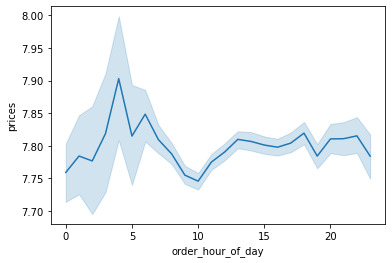

In [23]:
#make line graph for df_sample15 for prices vs order_hour_of_day
line_prices_v_hour_of_day_sample = sns.lineplot(data=df_sample15, x='order_hour_of_day', y='prices')

Prices are indicated to be higher in the early morning of around 4 am. However, the range of the confidence interval for that high point is nearly the exact same as the total range of prices throughout the day. As the rest of the day stays fairly conisstent at a price of 7.8 for any hour, further research would be needed to determine if there is really any difference.

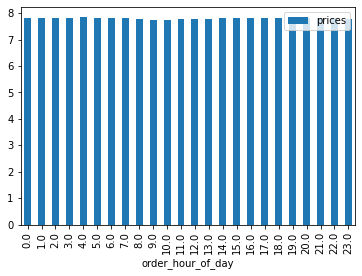

In [24]:
#create bar graph of sum of prices grouped by hours of the day
df_price_hour = df_cust_ord_prod.groupby('order_hour_of_day').agg({'prices':'mean'})
sum_price_by_hour_bar = df_price_hour.plot.bar()

## 6) 
Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

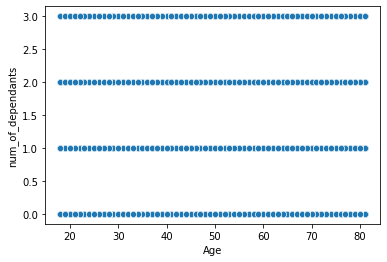

In [25]:
#create a scatterplot of age vs number of dependants of df_cust_ord_prod
age_family_status_scatterplot = sns.scatterplot(x='Age', y='num_of_dependants', data=df_cust_ord_prod)

In [26]:
#create random true/false list of df_cust_ord_prod for 85/15 split of data
np.random.seed(4)
list85_15_2 = np.random.rand(len(df_cust_ord_prod)) <=0.85

In [27]:
#create sample of df_cust_ord_prod called df_sample15 of 15% of data
df_sample15_2 = df_cust_ord_prod[~list85_15_2]

In [28]:
#strip df_sample15 to just the 'Age' and 'num_of_dependants' for a line graph
df_sample15_2 = df_sample15_2[['Age','num_of_dependants']]

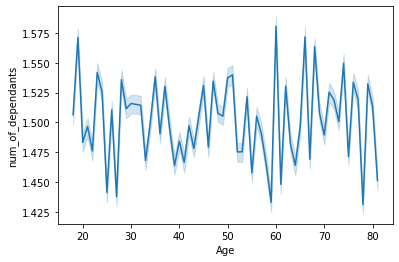

In [29]:
#create line graph of Age vs number of dependants from df_sample15_2
line_age_dependants = sns.lineplot(data=df_sample15_2, x='Age', y='num_of_dependants')

I cant see any connection between age and the number of dependants for customers. I also did the scatterplot above which helps to show that the number of dependants is only 0,1,2, or 3. Each number of dependants looks to occur across every age group. 

## 7)
You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

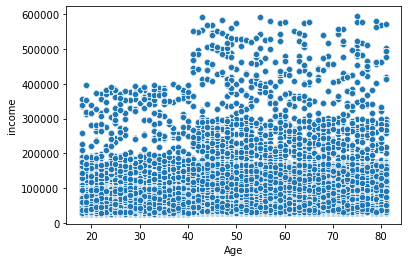

In [30]:
#create a scatterplot of age vs income of df_cust_ord_prod
age_income_scatterplot = sns.scatterplot(x='Age', y='income', data=df_cust_ord_prod)

Income, which we are calling spending power, does look to increase with age. Age 40 looks to be a significant factor for when the increase occurs.

The scatterplot can be visually broken into 2 categories for ages. Across the range of incomes there is a very dense bottom half of lower incomes and a lighter half of higher incomes.

Looking at the dense half, incomes range between 0 and 20k and below until about age 40. Beyond the age 40 the dense lower half of incomes increase their range from 0 to 30k.

Looking at the less dense half, incomes range between 20k and 40k and below until about age 40. Beyond the age 40 the less dense upper half of incomes increase their range from 30 to 60k.

## 8)
Export your visualizations as “.png” files in your relevant project folder.

In [31]:
#export visualizations
bar_price_range.figure.savefig(os.path.join(path,'4 Analysis', 'Visualizations', 'bar_price_range.dow.png'))

In [ ]:
histo_age.figure.savefig(os.path.join(path,'4 Analysis', 'Visualizations', 'histo_age.dow.png'))

In [ ]:
scatter_age_avg_user_price.figure.savefig(os.path.join(path,'4 Analysis', 'Visualizations', 'scatter_age_avg_user_price.dow.png'))

In [ ]:
line_sample.figure.savefig(os.path.join(path,'4 Analysis', 'Visualizations', 'line_day_of_week_and_prices.dow.png'))

In [ ]:
histogram_order_hour_of_day.figure.savefig(os.path.join(path,'4 Analysis', 'Visualizations', 'histogram_order_hour_of_day.dow.png'))

In [ ]:
bar_loyalty_flag.figure.savefig(os.path.join(path,'4 Analysis', 'Visualizations', 'bar_loyalty_flag.dow.png'))

In [ ]:
line_prices_v_hour_of_day_sample.figure.savefig(os.path.join(path,'4 Analysis', 'Visualizations', 'line_prices_v_hour_of_day_sample.dow.png'))

In [ ]:
age_family_status_scatterplot.figure.savefig(os.path.join(path,'4 Analysis', 'Visualizations', 'age_family_status_scatterplot.dow.png'))

In [ ]:
line_age_dependants.figure.savefig(os.path.join(path,'4 Analysis', 'Visualizations', 'line_age_dependants.dow.png'))

In [ ]:
age_income_scatterplot.figure.savefig(os.path.join(path,'4 Analysis', 'Visualizations', 'age_income_scatterplot.dow.png'))

In [ ]:
sum_price_by_hour_bar.figure.savefig(os.path.join(path,'4 Analysis', 'Visualizations', 'bar_avg_price_by_hour.png'))